In [126]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [127]:
df = pd.read_csv("pricing test data.csv")
df['event time'] = pd.to_datetime(df['event time'])
df['event time'] = df['event time'].dt.date
df.columns = ['Id', 'Date', 'Event', 'Group', 'Country', 'Source']
df

,Id,Date,Event,Group,Country,Source
0,56164500000000000,2023-02-01,click,test(6.99),Canada,NaN
1,56195200000000000,2023-02-01,click,test(6.99),Chile,NaN
2,56198900000000000,2023-02-01,click,test(6.99),Colombia,NaN
3,56095700000000000,2023-02-01,click,test(6.99),Italy,NaN
4,5616300000000000,2023-02-01,click,test(6.99),Mauritius,NaN
...,...,...,...,...,...,...
96339,56087800000000000,2023-01-31,purchase,test(6.99),United States,1.0
96340,56366200000000000,2023-02-03,purchase,test(6.99),Denmark,1.0
96341,56366200000000000,2023-02-03,purchase,test(6.99),Denmark,1.0
96342,5607900000000000,2023-03-17,purchase,control(9.99),United States,1.0


In [128]:
# df = pd.concat([df[df['Event'] == 'click'], 
#                 df[df['Event'] == 'purchase'].drop_duplicates(subset=['Id', 'Date'], keep='first')])
# df
df = df.drop_duplicates(subset=["Id", 'Event'])

In [129]:
id_list = pd.merge(df[df["Group"]=="Squircle"], df[df["Group"]=="Rounded rectangle"], on='Id', how='inner')["Id"].to_list()
df = df[~(df['Id'].isin(id_list))]
df

,Id,Date,Event,Group,Country,Source
0,56164500000000000,2023-02-01,click,test(6.99),Canada,NaN
1,56195200000000000,2023-02-01,click,test(6.99),Chile,NaN
2,56198900000000000,2023-02-01,click,test(6.99),Colombia,NaN
3,56095700000000000,2023-02-01,click,test(6.99),Italy,NaN
4,5616300000000000,2023-02-01,click,test(6.99),Mauritius,NaN
...,...,...,...,...,...,...
96323,56485500000000000,2023-02-05,purchase,test(6.99),United States,4.0
96325,56554600000000000,2023-02-06,purchase,control(9.99),United States,4.0
96333,56398200000000000,2023-02-03,purchase,control(9.99),Germany,4.0
96338,56326900000000000,2023-02-03,purchase,test(6.99),Switzerland,NaN


In [130]:
df.columns = ['user id', 'event time', 'event name', 'group', 'country', 'source']
# df.to_csv('pricing test data (tableau).csv', index=False)

<AxesSubplot:xlabel='event time'>

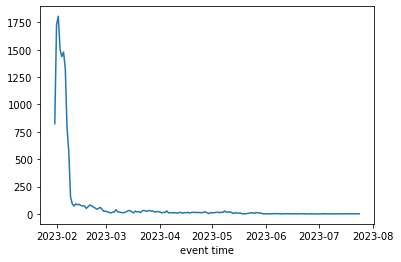

In [131]:
df.groupby('event time').count()['user id'].plot()

In [132]:
df.groupby('group').count()

,user id,event time,event name,country,source
group,,,,,
control(9.99),7217,7217,7217,7217,3425
test(6.99),7129,7129,7129,7129,3494


In [133]:
df.groupby('group').nunique()

,user id,event time,event name,country,source
group,,,,,
control(9.99),6619,149,2,153,11
test(6.99),6446,144,2,150,13


In [134]:
df1 = df.groupby(['group', 'event name']).count()['user id'].unstack()
df1['conversion'] = df1['purchase'] / df1['click']
df1.reset_index(inplace=True)

df1

event name,group,click,purchase,conversion
0,control(9.99),5936,1281,0.215802
1,test(6.99),5718,1411,0.246765


In [135]:
df1 = df[(df['event time'] >= pd.to_datetime('2023-01-31')) & 
         (df['event time'] <= pd.to_datetime('2023-02-28'))].groupby(['group', 'event name']).count()['user id'].unstack()
df1['conversion'] = df1['purchase'] / df1['click']
df1.reset_index(inplace=True)

df1

C:\Users\Dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


event name,group,click,purchase,conversion
0,control(9.99),5242,1239,0.236360
1,test(6.99),5026,1380,0.274572


In [136]:
df.columns = ['Id', 'Date', 'Event', 'Group', 'Country', 'Source']
df1 = df.copy()
df1 = df1.fillna(0)
df1 = df1.groupby(['Date', 'Group', 'Event']).count()['Id'].unstack().fillna(0).unstack().cumsum().stack(['Group'])
df1['Conversion'] = df1['purchase'] / df1['click']
df1.reset_index(inplace=True)
df1.rename(columns={'click': 'Click Count', 'purchase': 'Purchase Count'}, inplace=True)
df1

Event,Date,Group,Click Count,Purchase Count,Conversion
0,2023-01-31,control(9.99),296.0,114.0,0.385135
1,2023-01-31,test(6.99),300.0,114.0,0.380000
2,2023-02-01,control(9.99),907.0,313.0,0.345094
3,2023-02-01,test(6.99),986.0,343.0,0.347870
4,2023-02-02,control(9.99),1582.0,522.0,0.329962
...,...,...,...,...,...
288,2023-07-20,test(6.99),5714.0,1411.0,0.246937
289,2023-07-21,control(9.99),5936.0,1281.0,0.215802
290,2023-07-21,test(6.99),5715.0,1411.0,0.246894
291,2023-07-22,test(6.99),5716.0,1411.0,0.246851


C:\Users\Dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


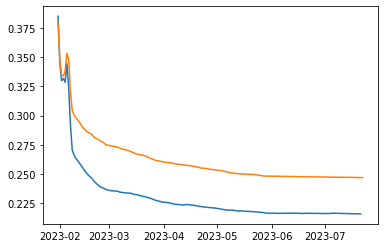

In [137]:
df1 = df1[(df1['Date'] >= pd.to_datetime('2023-01-31')) & (df1['Date'] <= pd.to_datetime('2023-07-22'))]
x = df1[df1['Group'] == 'control(9.99)']['Date']
y = df1[df1['Group'] == 'control(9.99)']['Conversion']

x1 = df1[df1['Group'] == 'test(6.99)']['Date']
y1 = df1[df1['Group'] == 'test(6.99)']['Conversion']

plt.plot(x, y)
plt.plot(x1, y1)

In [138]:
from statsmodels.stats.proportion import proportions_ztest

df2 = df1.groupby(['Date'])

dates = []
p_values = []
for group, data in df2:
    dates.append(group)
    try:
        n_a = data.iloc[0, 2]
        n_b = data.iloc[1, 2]
        conv_a = data.iloc[0, 3]
        conv_b = data.iloc[1, 3]
        p_values.append(proportions_ztest([conv_a, conv_b], [n_a, n_b])[1])
    except:
        p_values.append(p_values[-1])
print(dates)
print(p_values)

with open("pricing p-values.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for date, p in zip(dates, p_values):
        writer.writerow([date, p])

[datetime.date(2023, 1, 31), datetime.date(2023, 2, 1), datetime.date(2023, 2, 2), datetime.date(2023, 2, 3), datetime.date(2023, 2, 4), datetime.date(2023, 2, 5), datetime.date(2023, 2, 6), datetime.date(2023, 2, 7), datetime.date(2023, 2, 8), datetime.date(2023, 2, 9), datetime.date(2023, 2, 10), datetime.date(2023, 2, 11), datetime.date(2023, 2, 12), datetime.date(2023, 2, 13), datetime.date(2023, 2, 14), datetime.date(2023, 2, 15), datetime.date(2023, 2, 16), datetime.date(2023, 2, 17), datetime.date(2023, 2, 18), datetime.date(2023, 2, 19), datetime.date(2023, 2, 20), datetime.date(2023, 2, 21), datetime.date(2023, 2, 22), datetime.date(2023, 2, 23), datetime.date(2023, 2, 24), datetime.date(2023, 2, 25), datetime.date(2023, 2, 26), datetime.date(2023, 2, 27), datetime.date(2023, 2, 28), datetime.date(2023, 3, 1), datetime.date(2023, 3, 2), datetime.date(2023, 3, 4), datetime.date(2023, 3, 5), datetime.date(2023, 3, 6), datetime.date(2023, 3, 7), datetime.date(2023, 3, 8), datetim